# Final Project Capstone - Coursera

### Author: Qi Leng
### Date: 4/3/2020

#### Introduction
In this project, I am helping a friend in New York on solving a business problem. He is about to open a new Japanese-Italian fusion restaurant in New York, but he is not sure where is the right place. We had a few preferable locations in mind. I helped him gather information on three aspects of each location: restaurants nearby, number of WiFi hotspot nearby, and crime rate nearby.
<br>To make the data comparable, I decide to give a weight to every feature, and calculate a score for each location. The formula is:
$$ 0.8 * number\_of\_restaurants\_near\_by + 0.2 * number\_of\_wifi\_hotspots - 0.4 * number\_of\_crimes $$

#### Method
Next, import necessary libraries. 
<br> Besides Foursquare API, I also added New York Crime dataset and New York City WiFi dataset from Kaggle. 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim 
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize

import folium 
import warnings
warnings.filterwarnings('ignore')


Define Foursquare credentials 

In [2]:
import json, requests
url = 'https://api.foursquare.com/v2/venues/explore'

CLIENT_ID='5A4VSJ2CQUOZGF3ZLSLANHIGMES3ZAXEMV3GWLP3EIESGESZ'
CLIENT_SECRET='XIZFXQ1EGYULKMUNREIRIV3ADXEWEGZROXRQL4CLPBYNOKEG'
VERSION='20200403'
LIMIT = 30

Import WiFi Dataset from Kaggle. 

In [3]:
wifi = pd.read_csv('wifi.csv')

In [4]:
wifi.shape

(2566, 29)

In [5]:
crime = pd.read_csv('crime_data.csv')
crime = crime.head(20000)

In [6]:
crime.shape

(20000, 24)

In [7]:
restaurant = pd.read_csv('res.csv')

In [8]:
restaurant.shape

(348, 23)

In [9]:
restaurant.columns

Index(['name', 'street_address', 'google_map', 'review_count', 'phone',
       'website', 'restaurant_type', 'average_review', 'food_review',
       'service_review', 'ambience_review', 'value_review', 'price_range',
       'star_1', 'star_2', 'star_3', 'star_4', 'star_5', 'description',
       'restaurant_main_type', 'latitude', 'longitude', 'postal_code'],
      dtype='object')

In [10]:
# Use a latitude and longitude tuple list to save the geographical data of three spots.
geolocation = []
wifi_list = []
crime_list = []

### Choice 1: The Vessel
The first choice is to open a restaurant near the Vessel, which is one of the most popular sights in New York. There are also a lot of beautiful restaurants in this area. (Trust me, I am a New Yorker.)
<br>To start researching on the Vessel, first we should get the geographical location of this place.

In [11]:
# Choice 1: The Vessel
address = 'The Shops and Restaurants at Hudson Yards, New York, NY 10001'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
geolocation.append((latitude, longitude))

40.753355150000004 -74.0009410406605


Let us see if there is wifi available nearby. To define nearby, let us assume that the difference between latitude and longitude is less than 0.005.

In [12]:
wifi_num = 0
for index,row in wifi.iterrows():
    if abs(row['Latitude'] - latitude) < 0.005 and abs(row['Longitude'] - longitude) < 0.005:
        wifi_num += 1
wifi_list.append(wifi_num)

In [13]:
crime_num = 0
for index,row in crime.iterrows():
    if abs(row['Latitude'] - latitude) < 0.005 and abs(row['Longitude'] - longitude) < 0.005:
        crime_num += 1
crime_list.append(crime_num)

In [14]:
#Check the average price around the Vessel
price = []
for index,row in restaurant.iterrows():
    if abs(row['latitude'] - latitude) < 0.005 and abs(row['longitude'] - longitude) < 0.005:
        price.append(row['price_range'])
price = pd.DataFrame(data=price,columns=['Price Range'])
count = price.groupby(['Price Range'])['Price Range'].count()
count

Series([], Name: Price Range, dtype: int64)

In [15]:
search_query = 'Japanese'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

In [16]:
# Transform the result to dataframe
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
jp = dataframe.shape[0]

There are 5 Japanese restaurants around the Vessel, so the competition is not quite aggresive! Besides Japanese restaurants, there are also other types of restaurants, so there is a lot of diversity.

In [17]:
search_query = 'Italian'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

In [18]:
# Transform the result to dataframe
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
it = dataframe.shape[0]

Now the score for location at the Vessel is: 

In [19]:
score_Vessel = 0.8 * (jp+it) + 0.2 * wifi_num - 0.4 * crime_num
score_Vessel

15.0

### Choice 2: Broadway
The second choice is to open a restaurant near the Broadway, a cultural sight in New York. There are also a lot of beautiful restaurants in this area. 
<br>To start researching on the Broadway, first we should get the geographical location of this place.

In [20]:
# Choice 2: The Boradway
address = '1681 Broadway, New York, NY 10019'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
geolocation.append((latitude, longitude))

40.76339815 -73.98335504506701


In [21]:
wifi_num = 0
for index,row in wifi.iterrows():
    if abs(row['Latitude'] - latitude) < 0.005 and abs(row['Longitude'] - longitude) < 0.005:
        wifi_num += 1
wifi_list.append(wifi_num)

In [22]:
crime_num = 0
for index,row in crime.iterrows():
    if abs(row['Latitude'] - latitude) < 0.005 and abs(row['Longitude'] - longitude) < 0.005:
        crime_num += 1
crime_list.append(crime_num)

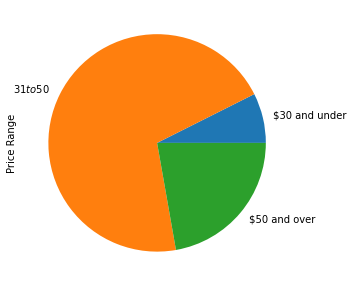

In [23]:
#Check the average price around the Broadway
price = []
for index,row in restaurant.iterrows():
    if abs(row['latitude'] - latitude) < 0.005 and abs(row['longitude'] - longitude) < 0.005:
        price.append(row['price_range'])
price = pd.DataFrame(data=price,columns=['Price Range'])
count = price.groupby(['Price Range'])['Price Range'].count()
plot = count.plot.pie(subplots=True, figsize=(5, 5))

In [24]:
search_query = 'Japanese'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# Transform the result to dataframe
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
jp = dataframe.shape[0]

In [25]:
search_query = 'Italian'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# Transform the result to dataframe
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
it = dataframe.shape[0]

Now the score for location at the Broadway is:

In [26]:
score_Broadway = 0.8 * (jp+it) + 0.2 * wifi_num - 0.4 * crime_num
score_Broadway

-0.3999999999999986

### Choice 3: SOHO
The last choice is to open a restaurant near SOHO, a luxury shopping area preferred by many celebrities and has high-quality restaurants. 
<br>To start researching on the SOHO, first we should get the geographical location of this place.

In [27]:
# Choice 3: The SOHO
address = '310 W Broadway, New York, NY 10013'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
geolocation.append((latitude, longitude))

40.7220039 -74.0043561


In [28]:
wifi_num = 0
for index,row in wifi.iterrows():
    if abs(row['Latitude'] - latitude) < 0.005 and abs(row['Longitude'] - longitude) < 0.005:
        wifi_num += 1
wifi_list.append(wifi_num)

In [29]:
crime_num = 0
for index,row in crime.iterrows():
    if abs(row['Latitude'] - latitude) < 0.005 and abs(row['Longitude'] - longitude) < 0.005:
        crime_num += 1
crime_list.append(crime_num)

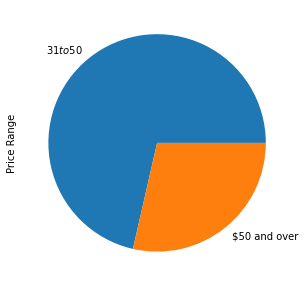

In [30]:
#Check the average price around the SOHO
price = []
for index,row in restaurant.iterrows():
    if abs(row['latitude'] - latitude) < 0.005 and abs(row['longitude'] - longitude) < 0.005:
        price.append(row['price_range'])
price = pd.DataFrame(data=price,columns=['Price Range'])
count = price.groupby(['Price Range'])['Price Range'].count()
plot = count.plot.pie(subplots=True, figsize=(5, 5))

In [31]:
search_query = 'Japanese'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# Transform the result to dataframe
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
jp = dataframe.shape[0]

In [32]:
search_query = 'Italian'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# Transform the result to dataframe
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
it = dataframe.shape[0]

Now the score for location at the Broadway is:

In [33]:
score_SOHO = 0.8 * (jp+it) + 0.2 * wifi_num - 0.4 * crime_num
score_SOHO

-5.800000000000004

Let us draw three markers on the map to understand their geographical locations.

In [34]:
# define the world map
nyc_map = folium.Map()

# define the world map centered around New York City with a low zoom level
nyc_map = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

labels = [['The Vessel'],['Broadway'],['SOHO']]
df_label = pd.DataFrame(data = labels,columns=['loc'])
label = list(df_label['loc'])

#label = geolocation
for tup,l in zip(geolocation,label):
    folium.Marker([tup[0], tup[1]],popup=l).add_to(nyc_map) 


# display world map
nyc_map

In [38]:
location = ['The Vessel','Broadway','SOHO']
data = list(zip(location, wifi_list, crime_list))
#data = wifi_list + crime_list
#data
compare = pd.DataFrame(data = data, columns=['Location','Number of Wifi','Number of Crimes'])
compare

,Location,Number of Wifi,Number of Crimes
0,The Vessel,9,39
1,Broadway,68,153
2,SOHO,15,112


#### Conclusion
Based on the criteria we had, the location The Vessel receives the highest score, and thus should be considered the best location to open a new Italian and Japanese restaurant.